<a href="https://colab.research.google.com/github/arashdeep3/cap-comp215/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

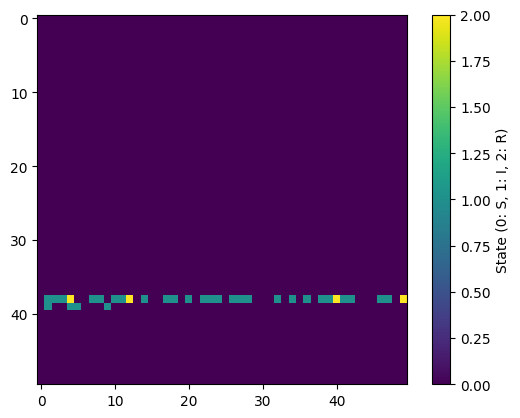

Numerical Data: (2466, 30, 4)


In [85]:
import numpy as np
import matplotlib.pyplot as plt

class SIR_Cell_Automata:
    """Initialize all the required variables for the SIR model using cellular automata."""
    def __init__(self, grid_size, infection_probability, recovery_probability):
        # grid_size: Size of the grid representing the population
        self.grid_size = grid_size

        # infection_probability: Probability of the infection spread by the disease
        self.infection_probability = infection_probability

        # recovery_probability: Probability of the person to recover from the disease
        self.recovery_probability = recovery_probability

        # Initialize the grid with all cells susceptible
        self.grid = np.zeros((grid_size, grid_size), dtype=int)  # 0 for susceptible, 1 for infected, 2 for recovered
        # Infect a random cell
        self.grid[np.random.randint(0, grid_size), np.random.randint(0, grid_size)] = 1

    def simulation(self):
        # Define the infection kernel
        infection_kernel = np.array([[1, 1, 1],
                                     [1, 0, 1],
                                     [1, 1, 1]])

        # Convert the grid to binary values
        binary_grid = (self.grid > 0).astype(int)

        # Compute the number of infected neighbors for each cell
        num_infected_neighbors = np.correlate(binary_grid.flatten(), infection_kernel.flatten(), mode='same').reshape(self.grid.shape)

        # Update the grid based on infection and recovery probabilities
        new_grid = np.zeros_like(self.grid)
        new_grid[np.logical_and(self.grid == 0, np.random.random(self.grid.shape) < self.infection_probability * num_infected_neighbors)] = 1
        new_grid[np.logical_and(self.grid == 1, np.random.random(self.grid.shape) < self.recovery_probability)] = 2

        self.grid = new_grid

    def simulate(self, steps):
        for _ in range(steps):
            self.simulation()

    def plot_data(self):
        plt.imshow(self.grid, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='State (0: S, 1: I, 2: R)')
        plt.show()

    def numerical_data(self):
        num_susceptible = np.sum(self.grid == 0)
        num_infected = np.sum(self.grid == 1)
        num_recovered = np.sum(self.grid == 2)
        return num_susceptible, num_infected, num_recovered

# Example usage:
model = SIR_Cell_Automata(grid_size=50, infection_probability=0.3, recovery_probability=0.1)
model.simulate(steps=10)
model.plot_data()
print("Numerical Data:", model.numerical_data())
